In [90]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 이미지 불러오기  (-1 : 이미지 그대로 불러오기, 0 : 흑백으로 불러오기, 1 : 알파 채널 무시한 컬러 이미지 불러오기)
src = cv2.imread('./Data/Example Student ID Card7.jpg', -1)

# 모니터 화면크기보다 이미지가 커서 짤리는 현상이 발생해 가로 세로 비율 반 반으로 사이즈 줄임
src = cv2.resize(src, (0, 0), fx=0.5, fy=0.5)

# 나중에 Contours를 그릴 원본의 복사본 생성
dst = src.copy()

# resize된 이미지의 크기를 확인해보기 위해 사용 src.shape(h, w, c), x2하면 원본 크기 알 수 있음
print(src.shape)

if src is None:
    print('Image load failed!')
    sys.exit()

# 이미지 출력 - 원본 컬러 이미지 그대로 출력
cv2.imshow('src', src)
cv2.waitKey(0)
cv2.destroyAllWindows()

(693, 520, 3)


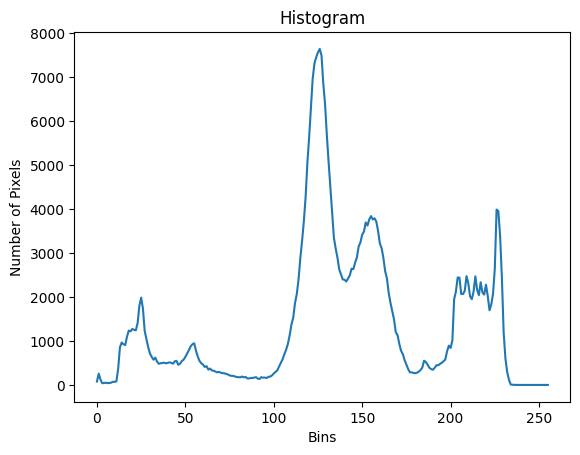

In [91]:
# 흑백으롭 변경
# 더 간단하게 이미지를 인식하기 위해 채널을 1로 변경
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# 히스토그램 계산
# 흑백 이미지의 채널에 따른 픽셀수의 히스토그램을 시각화시켜 확인해보고 싶어서 실행
hist = cv2.calcHist([src_gray], [0], None, [256], [0, 256])

# 히스토그램 그래프 시각화
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Bins')  # 명암 값
plt.ylabel('Number of Pixels')   # 픽셀 수
plt.show()

# 흑백 이미지 출력
cv2.imshow('src_gray', src_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [92]:
# 가우시안 블러 적용 / 노이즈 제거를 위해
# 이미지의 색수차를 줄여 색상간의 경계선을 흐릿하게 만들어 이미지를 부드럽게 만들어 노이즈 제거하기 위함
# 단, 이 때 가우시안 블러를 많이 적용할 수록 흐릿해짐
src_blurred = cv2.GaussianBlur(src_gray, ksize=(7, 7), sigmaX=0)

# 가우시안 블러 처리 된 이미지 출력
cv2.imshow('src_blurred', src_blurred)
cv2.waitKey(0)
cv2.destroyAllWindows()